In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [3]:
import pymysql

In [4]:
data=pd.read_excel('measurements2.xlsx')

In [5]:
data

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,NaN,NaN
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    376 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   specials       93 non-null     object 
 6   gas_type       388 non-null    object 
 7   AC             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill liters  13 non-null     float64
 11  refill gas     13 non-null     object 
dtypes: float64(4), int64(5), object(3)
memory usage: 36.5+ KB


In [7]:
data['specials'].unique()

array([nan, 'AC rain', 'AC', 'rain', 'snow', 'AC snow',
       'half rain half sun', 'sun', 'AC sun', 'sun ac', 'ac', 'AC Sun',
       'ac rain'], dtype=object)

In [8]:
data.drop(labels=['refill liters','refill gas'],axis=1,inplace=True)

In [9]:
data

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0
...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0


In [10]:
data.drop(labels=['specials'],axis=1,inplace=True)

In [11]:
data.dropna(axis=0,inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376 entries, 0 to 387
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   distance      376 non-null    float64
 1   consume       376 non-null    float64
 2   speed         376 non-null    int64  
 3   temp_inside   376 non-null    float64
 4   temp_outside  376 non-null    int64  
 5   gas_type      376 non-null    object 
 6   AC            376 non-null    int64  
 7   rain          376 non-null    int64  
 8   sun           376 non-null    int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 29.4+ KB


In [13]:
data.to_excel('Cleanmeasure.xlsx')

In [14]:
data_gas=data

In [15]:
le = preprocessing.LabelEncoder()
data['gas_type'] = le.fit_transform(data.gas_type.values)

In [16]:
data

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12,0,0,0,0
1,12.0,4.2,30,21.5,13,0,0,0,0
2,11.2,5.5,38,21.5,15,0,0,0,0
3,12.9,3.9,36,21.5,14,0,0,0,0
4,18.5,4.5,46,21.5,15,0,0,0,0
...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,1,0,0,0
384,16.1,4.3,38,25.0,31,1,1,0,0
385,16.0,3.8,45,25.0,19,1,0,0,0
386,15.4,4.6,42,25.0,31,1,1,0,0


# E10=0, SP98=1

In [17]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
distance,376.0,19.797340,22.988878,1.3,11.8,14.6,19.0,216.1
consume,376.0,4.925266,1.040705,3.3,4.3,4.7,5.3,12.2
speed,376.0,41.957447,13.714354,14.0,32.0,40.5,50.0,90.0
temp_inside,376.0,21.929521,1.010455,19.0,21.5,22.0,22.5,25.5
temp_outside,376.0,11.340426,7.066999,-5.0,6.0,10.0,16.0,31.0
gas_type,376.0,0.582447,0.493813,0.0,0.0,1.0,1.0,1.0
AC,376.0,0.079787,0.271325,0.0,0.0,0.0,0.0,1.0
rain,376.0,0.125000,0.331160,0.0,0.0,0.0,0.0,1.0
sun,376.0,0.082447,0.275411,0.0,0.0,0.0,0.0,1.0


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376 entries, 0 to 387
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   distance      376 non-null    float64
 1   consume       376 non-null    float64
 2   speed         376 non-null    int64  
 3   temp_inside   376 non-null    float64
 4   temp_outside  376 non-null    int64  
 5   gas_type      376 non-null    int32  
 6   AC            376 non-null    int64  
 7   rain          376 non-null    int64  
 8   sun           376 non-null    int64  
dtypes: float64(3), int32(1), int64(5)
memory usage: 27.9 KB


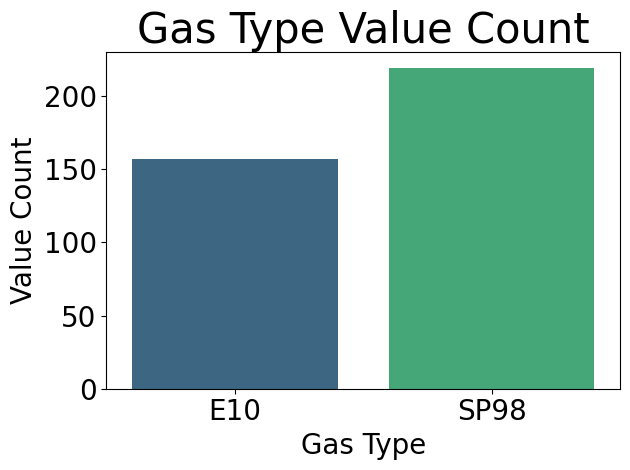

In [19]:
sns.barplot(data=data,x=data.groupby(by='gas_type')['gas_type'].count().index,
            y=data.groupby(by='gas_type')['gas_type'].count(), 
            palette=sns.color_palette('viridis',
                                      data.groupby(by='gas_type')['gas_type'].count().unique().shape[0]))
title_font = {'size':'30'}
plt.title("Gas Type Value Count",fontdict=title_font)
plt.grid(False)
label_font = {'size':'20'} 
plt.xlabel("Gas Type", fontdict=label_font);
plt.ylabel('Value Count', fontdict=label_font);

plt.xticks([0, 1], ['E10', "SP98"])
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tight_layout()
plt.show()

SP98 fuel is more used than E10

[[Text(0, 0, 'Consumption')]]

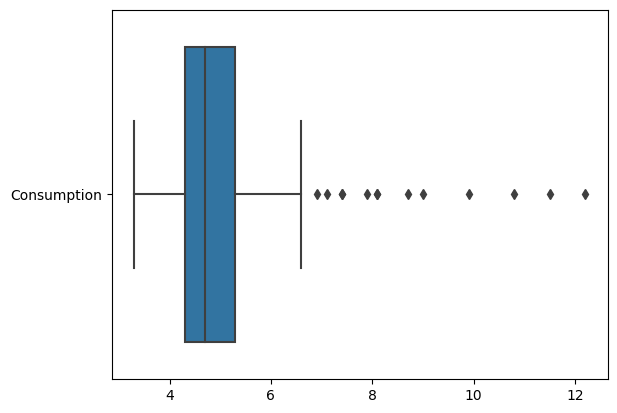

In [20]:
sns.boxplot(data['consume'],orient='h').set(yticklabels=['Consumption'])

[[Text(0, 0, 'Distance')]]

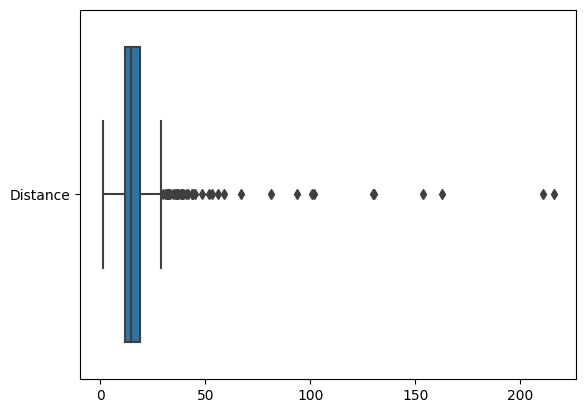

In [21]:
sns.boxplot(data['distance'],orient='h').set(yticklabels=['Distance'])

[[Text(0, 0, 'Speed')]]

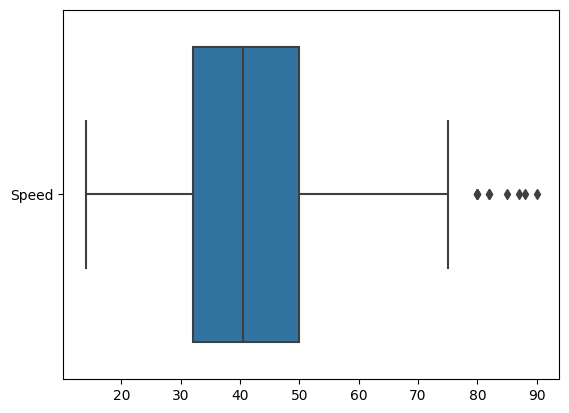

In [22]:
sns.boxplot(data['speed'],orient='h').set(yticklabels=['Speed'])

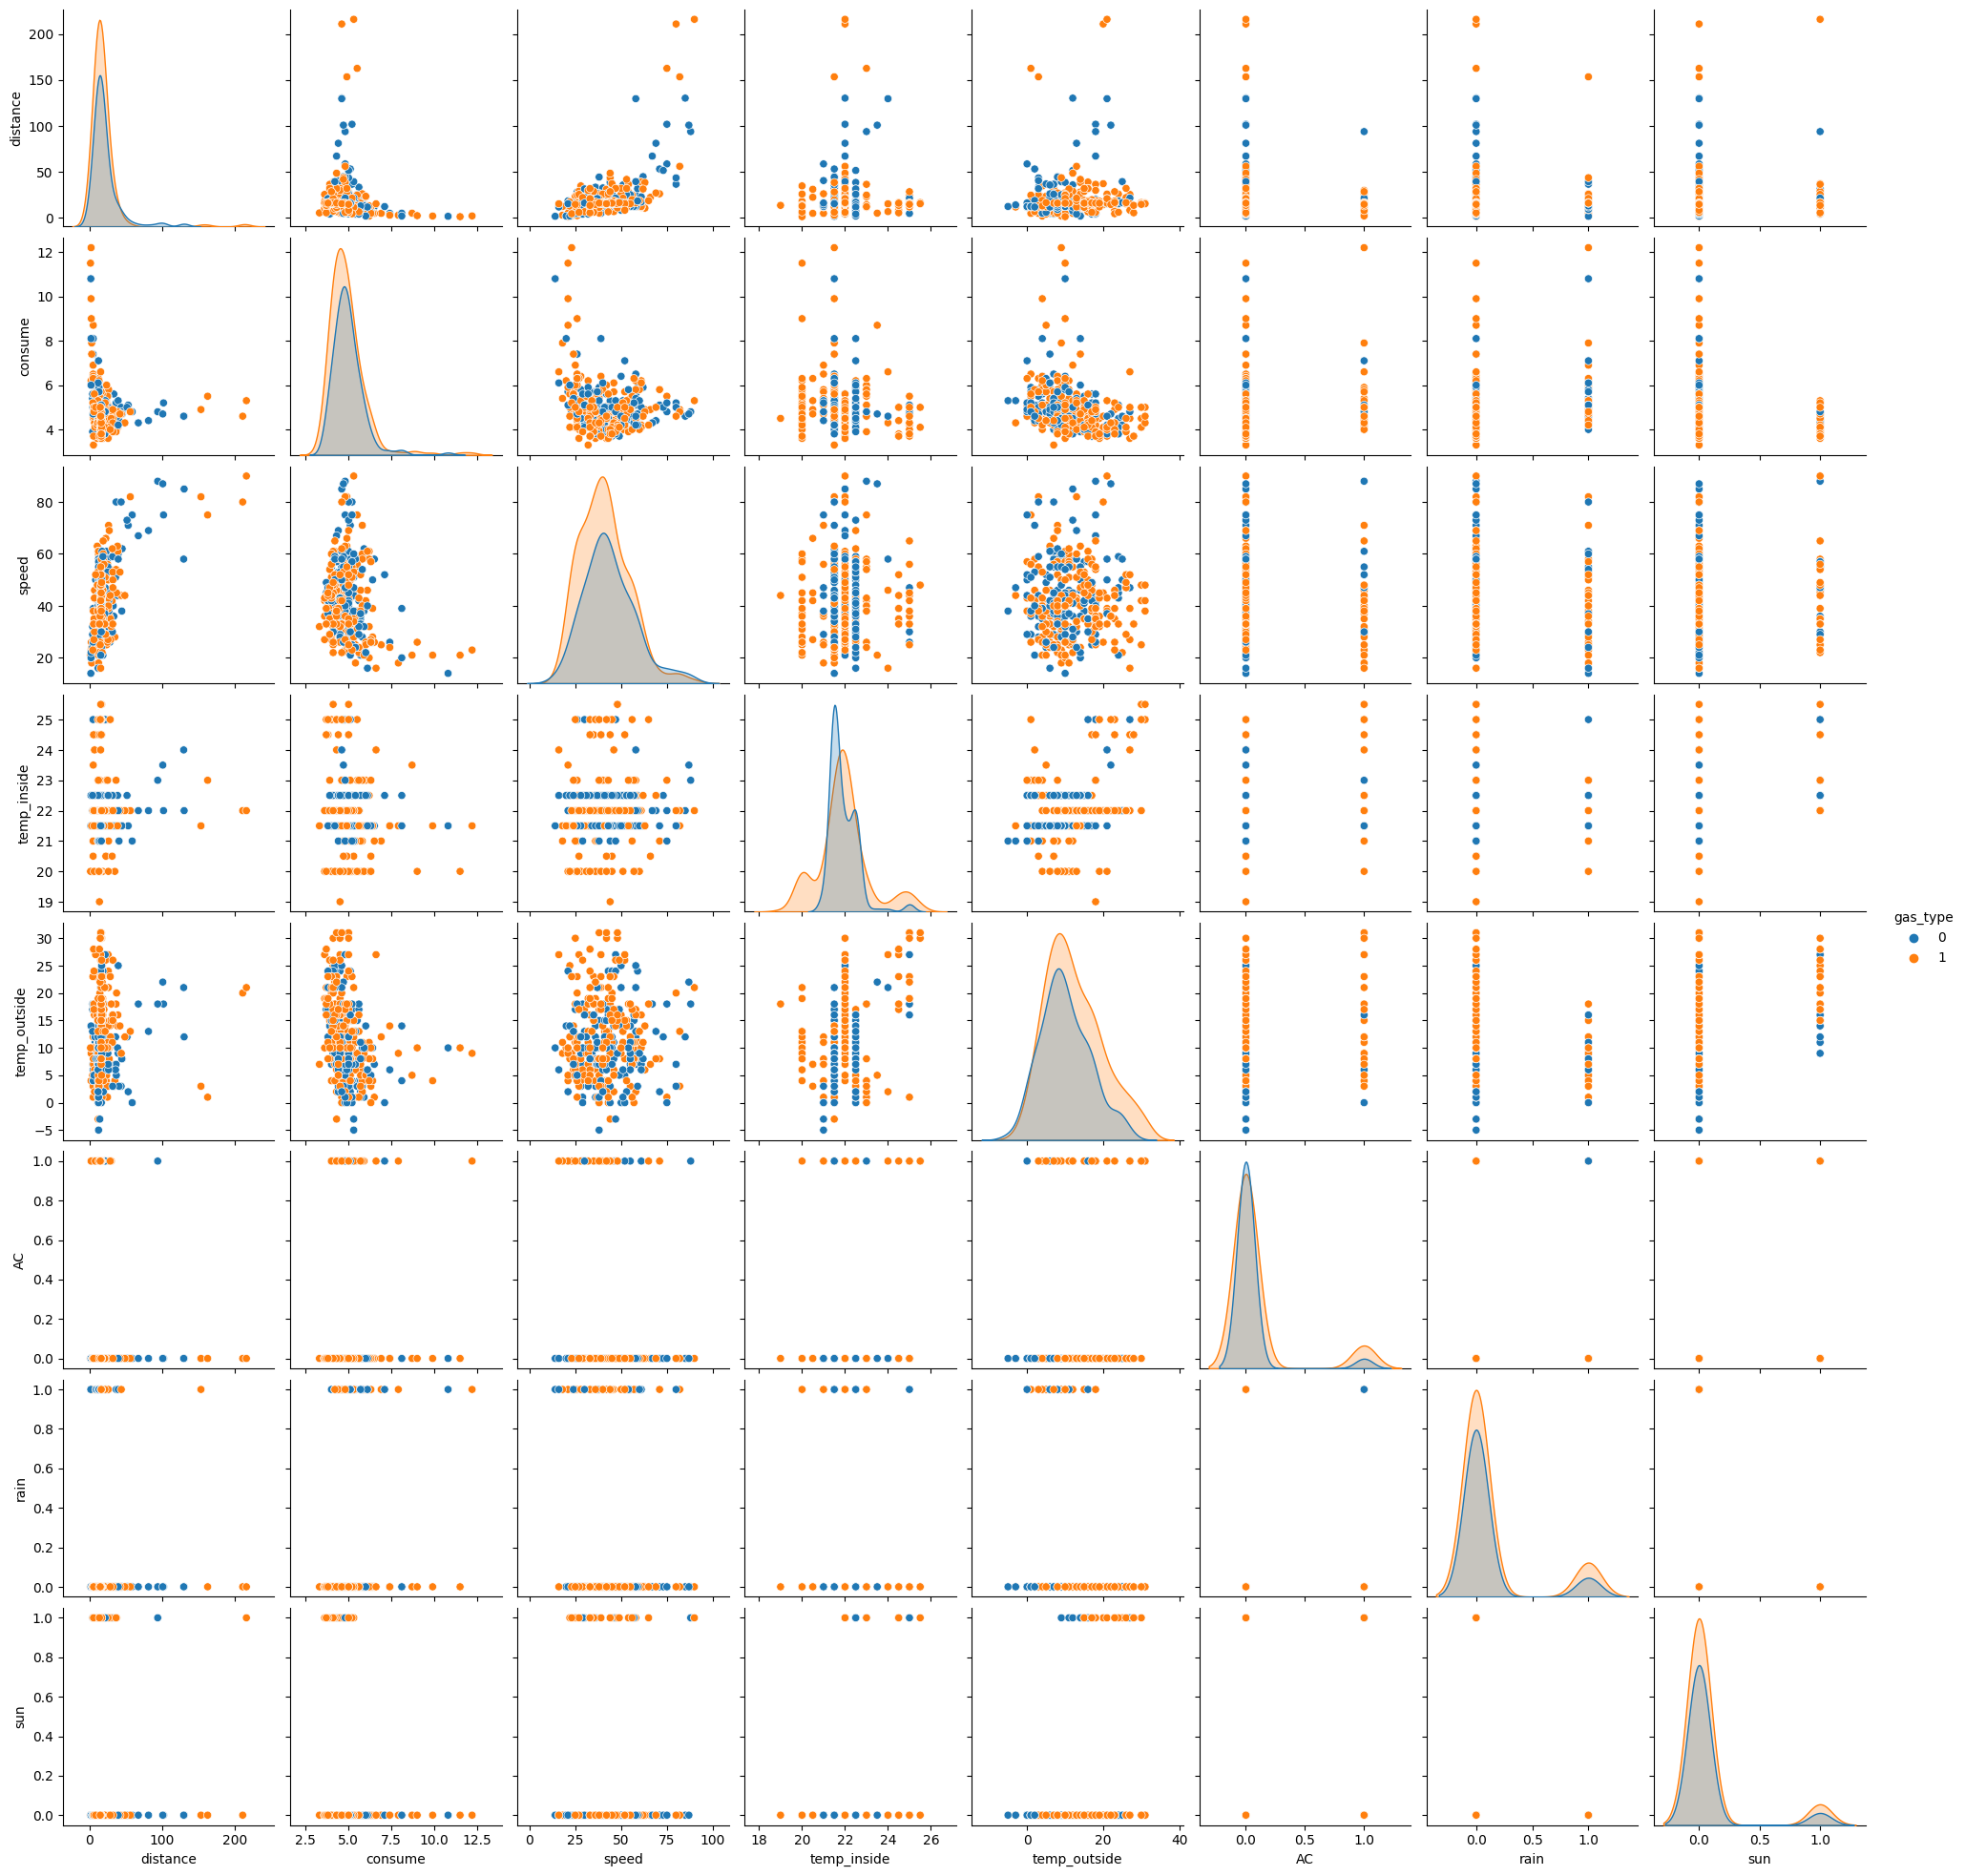

In [23]:
sns.pairplot(data, hue="gas_type")

# Analysis of gas type performance

In [24]:
sns.set(rc={'figure.figsize':(11,8)})

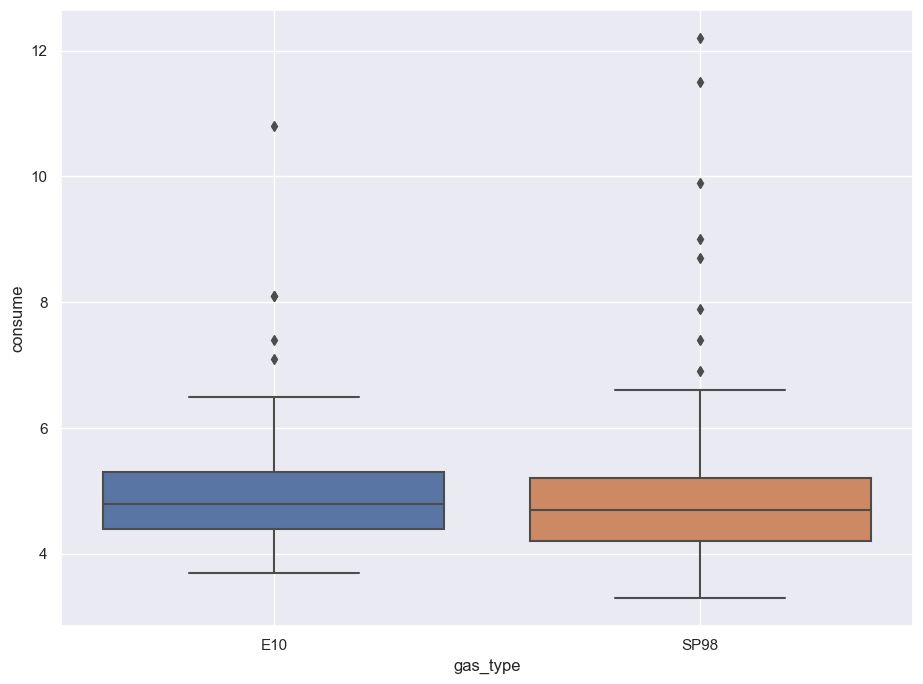

In [25]:
sns.boxplot(data=data, x='gas_type',y='consume').set(xticklabels=['E10','SP98'])
plt.grid(True)

We can observe that overall there is a little more gas consumption with E10 than SP98.

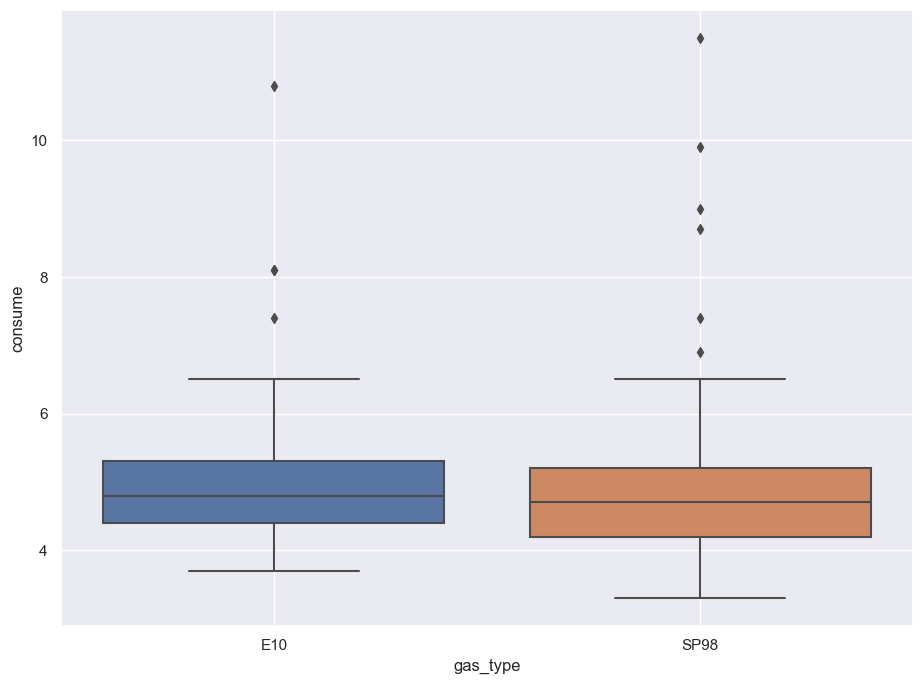

In [26]:
sns.boxplot(data=data.loc[data['AC'] == 0], x='gas_type',y='consume').set(xticklabels=['E10','SP98'])
plt.grid(True)

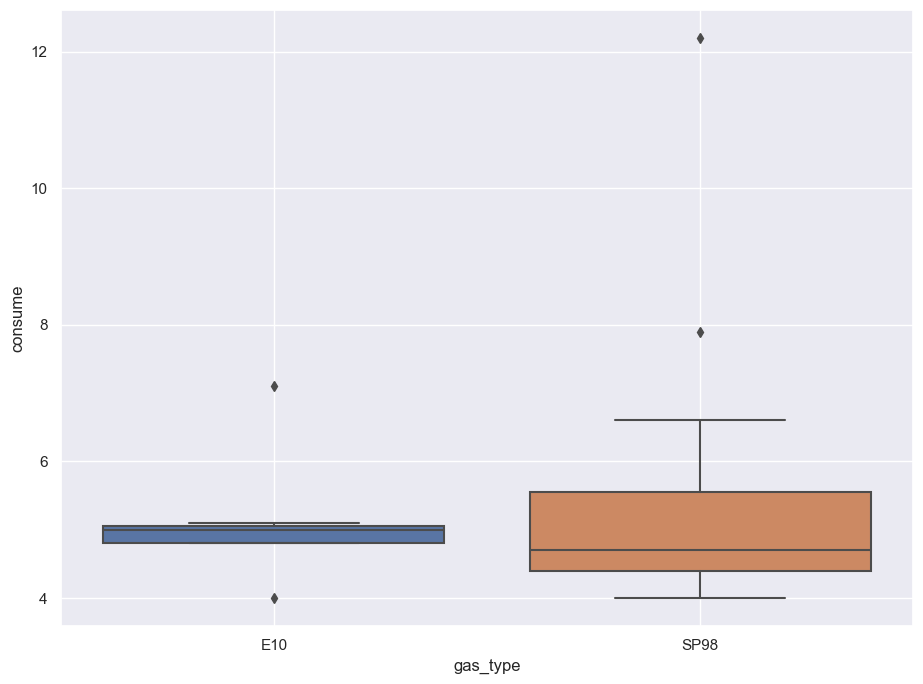

In [27]:
sns.boxplot(data=data.loc[data['AC'] == 1], x='gas_type',y='consume').set(xticklabels=['E10','SP98'])
plt.grid(True)

E10 consumption is greater than SP98 when the AC is off, however SP98 has more consumption when the AC is on.

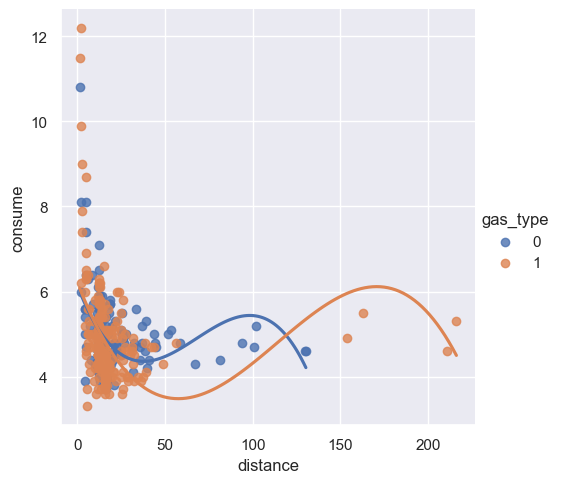

In [73]:
sns.lmplot(data=data, x='distance', y='consume',hue='gas_type',ci=None, order=3, fit_reg=True)

SP98 has lower consumption rate at short distances

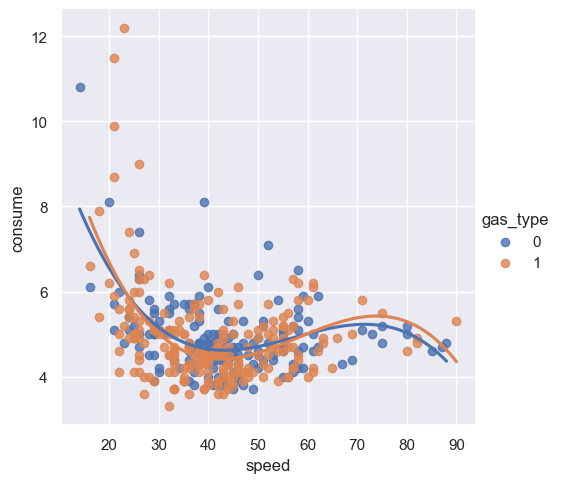

In [74]:
sns.lmplot(data=data, x='speed', y='consume',hue='gas_type',ci=None, order=3, fit_reg=True)

Consumption goes up as speed increases, however at lower speeds E10 seems to get higher consumptionr rates and at higher speeds E10 gets lower consumption rates than SP98.

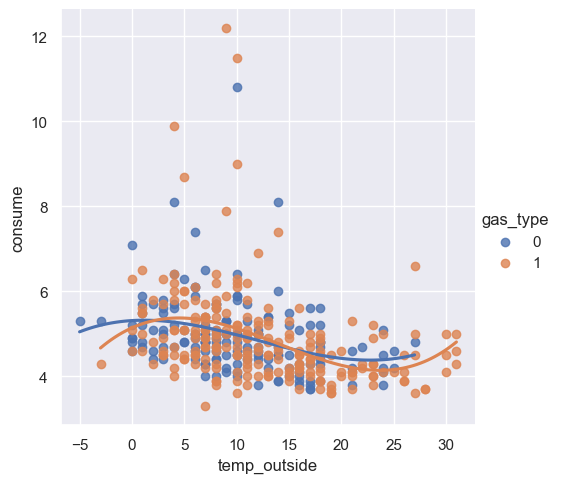

In [75]:
sns.lmplot(data=data, x='temp_outside', y='consume',hue='gas_type',ci=None, order=3, fit_reg=True)

There is more consumption as temperature decreases,the user may tend to put the AC Off and thus result in lower consumption.

In [29]:
data.corr()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
distance,1.000000,-0.131379,0.565505,0.075305,0.086774,-0.047877,-0.027670,-0.022129,0.078627
consume,-0.131379,1.000000,-0.234537,-0.161991,-0.318758,-0.020928,0.093892,0.247699,-0.169173
speed,0.565505,-0.234537,1.000000,0.059725,0.019327,-0.099495,-0.036351,-0.002936,0.077181
temp_inside,0.075305,-0.161991,0.059725,1.000000,0.361308,0.010340,0.297775,-0.037356,0.246120
temp_outside,0.086774,-0.318758,0.019327,0.361308,1.000000,0.156990,0.169374,-0.185731,0.349988
gas_type,-0.047877,-0.020928,-0.099495,0.010340,0.156990,1.000000,0.109996,0.059112,0.038120
AC,-0.027670,0.093892,-0.036351,0.297775,0.169374,0.109996,1.000000,0.244848,0.090164
rain,-0.022129,0.247699,-0.002936,-0.037356,-0.185731,0.059112,0.244848,1.000000,-0.113298
sun,0.078627,-0.169173,0.077181,0.246120,0.349988,0.038120,0.090164,-0.113298,1.000000


<AxesSubplot: >

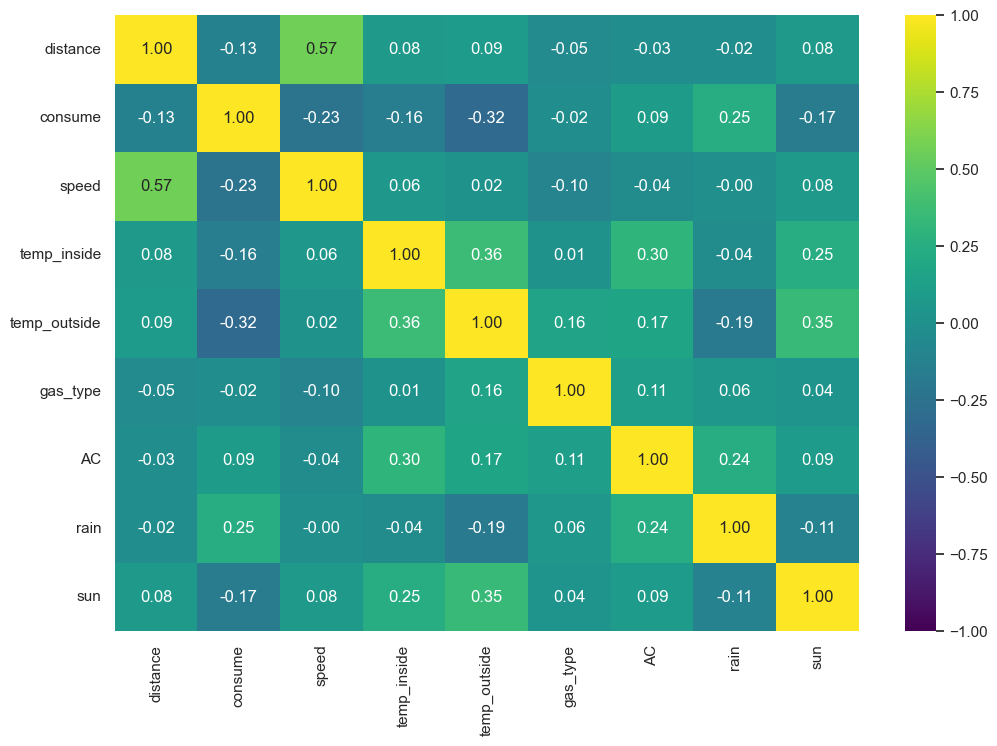

In [30]:
sns.heatmap(data.corr(),annot=True,vmin=-1,fmt=".2f",cmap='viridis')

There exists high correlation only between speed and distance which is expected.

In [31]:
data

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12,0,0,0,0
1,12.0,4.2,30,21.5,13,0,0,0,0
2,11.2,5.5,38,21.5,15,0,0,0,0
3,12.9,3.9,36,21.5,14,0,0,0,0
4,18.5,4.5,46,21.5,15,0,0,0,0
...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,1,0,0,0
384,16.1,4.3,38,25.0,31,1,1,0,0
385,16.0,3.8,45,25.0,19,1,0,0,0
386,15.4,4.6,42,25.0,31,1,1,0,0


In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [33]:
X=data[['distance','consume','speed','temp_inside','temp_outside','AC','rain','sun']]
y=data[['gas_type']]
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.15,random_state=2)
model=LinearRegression().fit(X_train,y_train.values.ravel())

In [34]:
model.score(X_test,y_test),model.score(X_train,y_train)

(-0.01677772828245061, 0.053580022129991245)

A basic linear regression model is inappropiate for this case since the residuals are not  nearly distributed in a uniform way all along the x axis.

Logistic regression is appropriate to this fit and when the dependent variable is dichotomous rather than continuous i.e. Gas Type E10 or SP98.

In [36]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(solver="newton-cg",random_state=2).fit(X_train,y_train.values.ravel())
y_predict_LR = LR_model.predict(X_test)
LR_model_score = LR_model.score(X_test, y_test)
print(round(LR_model_score,2))

0.54


Now we have a much better score

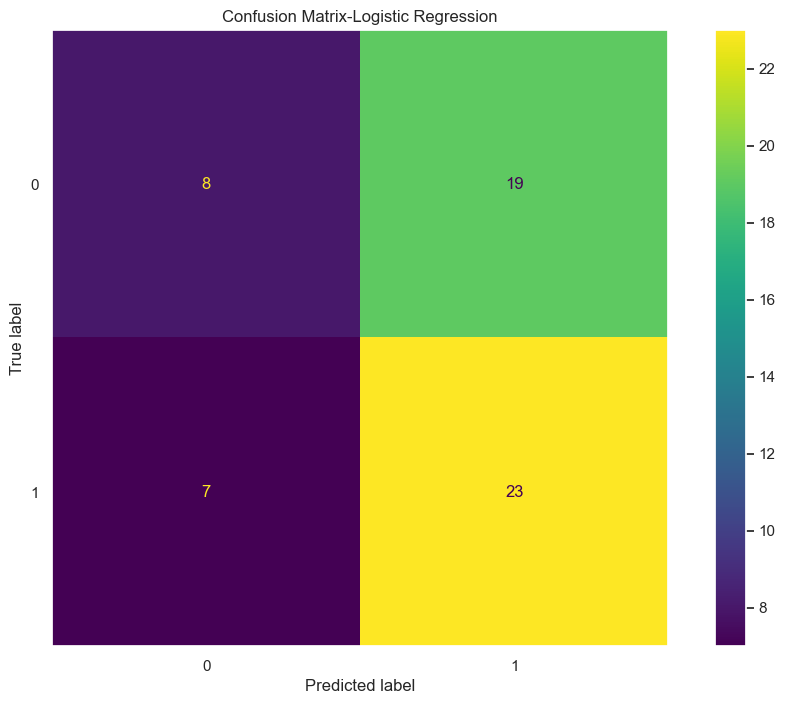

In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_predict_LR,cmap='viridis')
plt.title('Confusion Matrix-Logistic Regression')
plt.grid(False)
plt.show()